# Educational Notebook: Introduction to Machine Learning with Python

**Objective:** This notebook provides a hands-on introduction to fundamental concepts in Machine Learning using Python. By the end of this session, you will be able to load and explore data using `pandas`, build a classification model with `scikit-learn`, and evaluate its performance using key metrics.

**Core Concepts Covered:**
- **Data Fundamentals:** The importance of features, data cleaning, and preparation.
- **Machine Learning Basics:** Supervised learning, model training, and testing.
- **Python for Data Science:** Practical use of `pandas`, `numpy`, `matplotlib`, and `scikit-learn`.

---

## Part 1: Data Loading and Exploratory Data Analysis (EDA) with `pandas`

In this section, we will work with the classic Titanic dataset. Our goal is to load the data and perform an initial exploration to understand its structure and content. This process is a critical first step in any machine learning project.

**About the Titanic Dataset:**
The dataset contains information about passengers on the Titanic, such as their age, sex, class, and whether they survived the disaster. We will use this data to understand the factors that may have influenced survival.

### 1.1 - Setting up the Environment
First, we need to import the necessary Python libraries.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# ignore warnings for cleaner output
import warnings
warnings.filterwarnings('ignore')

### 1.2 - Loading the Data
We will load the Titanic dataset from a publicly available URL. This is a common practice when working with well-known datasets.

In [26]:
# Load the dataset from a URL -> Kaggle'dan indirilen de entegre edilebilir
url = 'https://raw.githubusercontent.com/datasciencedojo/datasets/master/titanic.csv'
titanic_df = pd.read_csv(url)

print("First 5 rows of the Titanic dataset:")
titanic_df.head(10)

First 5 rows of the Titanic dataset:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


### 1.3 - Initial Data Exploration
Let's get a numerical summary for our data.

In [3]:
print("Dataframe Info:")
titanic_df.info()

Dataframe Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


**Observations from `.info()`:**
- We have 891 entries (passengers).
- There are **missing values** in `Age`, `Cabin`, and `Embarked`. This is a very common issue in real-world data and will require "data cleaning" in the next part.
- We have a mix of numerical (`int64`, `float64`) and categorical (`object`) data.

In [4]:
# Get descriptive statistics for numerical columns
print("\nDescriptive Statistics:")
titanic_df.describe()


Descriptive Statistics:


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


**Observations from `.describe()`:**
- **Survived:** About 38% of the passengers in this dataset survived (since the mean is 0.38 because survived -> 1, not survived -> 0). This is an example of an "imbalanced dataset."
- **Age:** The average age was around 29.7 years.
- **Fare:** The ticket fare varied significantly.
- **Pclass** Mean of ~2.31 suggests more lower-class passengers
- **SibSp and Parch:** Median of 0 for both indicates majority traveled alone


### 1.4 - Visualizing the Data
Visualizations are a powerful way to understand relationships in the data.

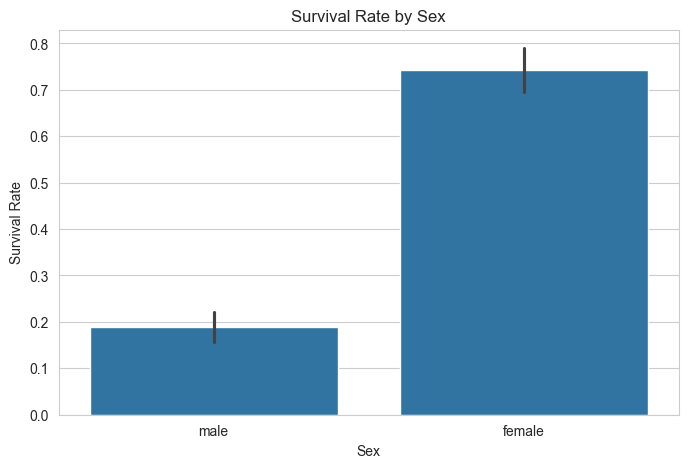

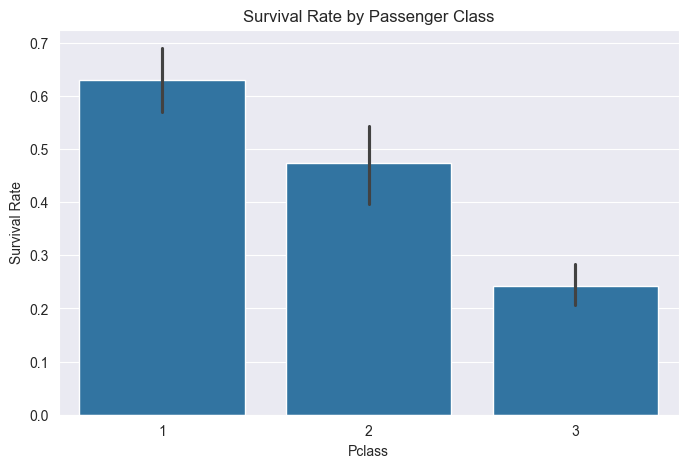

In [5]:
# Survival rate by Sex
# Set a style for our plots
sns.set_style("whitegrid") #dokümantasyon için https://seaborn.pydata.org/tutorial/aesthetics.html -> dökümantasyonun önemi
plt.figure(figsize=(8, 5))
sns.barplot(x='Sex', y='Survived', data=titanic_df)
plt.title('Survival Rate by Sex')
plt.ylabel('Survival Rate')
plt.show()

# Survival rate by Class
# Set a style for our plots
sns.set_style("darkgrid")
plt.figure(figsize=(8, 5))
sns.barplot(x='Pclass', y='Survived', data=titanic_df)
plt.title('Survival Rate by Passenger Class')
plt.ylabel('Survival Rate')
plt.show()

**EDA Summary:**
From this brief analysis, we can already see strong patterns:
- Female passengers had a much higher rate of survival than male passengers.
- Passengers in the first class had a significantly higher survival rate than those in the third class.

This process of turning data into insights is the essence of exploratory data analysis.

---

## Part 2: Deeper Dive - Titanic Survival Prediction 🚢

In Part 1, we performed a basic exploratory analysis. Now, let's go deeper. Our goal is to prepare this data, try to build new features, and train a model to predict whether a passenger survived.

### 2.1 - Data Cleaning

Real-world data is often messy. Before we can train a model, we need to handle the missing values we identified earlier.

In [6]:
# Check for null values
titanic_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

-   **Age:** Has 177 missing values. We will fill these using the **median** age, which is robust to outliers.
-   **Cabin:** Has 687 missing values. This is too many to fill, so we will drop this column.
-   **Embarked:** Has only 2 missing values. We will fill these with the most common port (the **mode**).

In [7]:
# Impute Age with the median
titanic_df['Age'].fillna(titanic_df['Age'].median(), inplace=True)

# Impute Embarked with the mode
titanic_df['Embarked'].fillna(titanic_df['Embarked'].mode()[0], inplace=True)

# Drop the Cabin column
titanic_df.drop('Cabin', axis=1, inplace=True)

# Verify that there are no more missing values
print("Missing values after cleaning:")
titanic_df.isnull().sum()

Missing values after cleaning:


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

### 2.2 - Feature Engineering

**Feature engineering** is the art of creating new, more informative features from existing ones. This can significantly improve model performance.

#### Converting Categorical Features
Machine learning models require numerical input. We'll convert categorical columns like `Sex` and `Embarked` into numbers.

In [8]:
# Convert 'Sex' column: female -> 1, male -> 0
titanic_df['Sex'] = titanic_df['Sex'].map({'female': 1, 'male': 0}).astype(int)

# Convert 'Embarked' using one-hot encoding
titanic_df = pd.get_dummies(titanic_df, columns=['Embarked'], drop_first=True)

print("Dataframe after converting categorical features:")
titanic_df.head()

Dataframe after converting categorical features:


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",0,22.0,1,0,A/5 21171,7.2500,False,True
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,38.0,1,0,PC 17599,71.2833,False,False
2,3,1,3,"Heikkinen, Miss. Laina",1,26.0,0,0,STON/O2. 3101282,7.9250,False,True
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,35.0,1,0,113803,53.1000,False,True
4,5,0,3,"Allen, Mr. William Henry",0,35.0,0,0,373450,8.0500,False,True


#### Creating New Features from Existing Ones
Let's create a `FamilySize` feature by combining `SibSp` (siblings/spouses) and `Parch` (parents/children).

In [9]:
# Create FamilySize feature
titanic_df['FamilySize'] = titanic_df['SibSp'] + titanic_df['Parch'] + 1 

# Create an IsAlone feature
titanic_df['IsAlone'] = 0
titanic_df.loc[titanic_df['FamilySize'] == 1, 'IsAlone'] = 1

#### Dropping Unnecessary Features
`Name`, `Ticket`, and `PassengerId` are unique identifiers and don't provide predictive value. We can also remove the original columns we combined.

In [10]:
# Drop columns that are no longer needed
titanic_df = titanic_df.drop(['PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch'], axis=1)

print("\nFinal, cleaned dataframe ready for modeling:")
titanic_df.head()


Final, cleaned dataframe ready for modeling:


,Survived,Pclass,Sex,Age,Fare,Embarked_Q,Embarked_S,FamilySize,IsAlone
0,0,3,0,22.0,7.2500,False,True,2,0
1,1,1,1,38.0,71.2833,False,False,2,0
2,1,3,1,26.0,7.9250,False,True,1,1
3,1,1,1,35.0,53.1000,False,True,2,0
4,0,3,0,35.0,8.0500,False,True,1,1


### 2.3 - Model Training and Evaluation on Titanic Data

Now that our data is clean, we can build our survival prediction model.

#### Preparing Data for Modeling

First, we separate our features (`X`) from our target variable (`y`).

In [11]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, ConfusionMatrixDisplay

# Define features (X) and target (y)
X = titanic_df.drop("Survived", axis=1)
y = titanic_df["Survived"]

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Scale features to a similar range
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#### Training the Model
We'll use a `LogisticRegression`, which is a powerful and popular model.

In [12]:
# Create and train the model
lr_model = LogisticRegression(random_state=42) # to get consistent results
lr_model.fit(X_train_scaled, y_train)

# Make predictions
y_pred = lr_model.predict(X_test_scaled)

#### Evaluating the Model

Model Accuracy: 79.89%

Classification Report:
              precision    recall  f1-score   support

           0       0.81      0.86      0.83       105
           1       0.78      0.72      0.75        74

    accuracy                           0.80       179
   macro avg       0.80      0.79      0.79       179
weighted avg       0.80      0.80      0.80       179

Confusion Matrix:


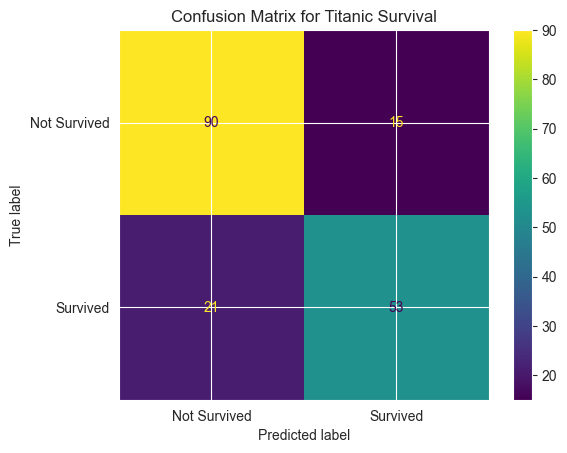

In [13]:
# 1. Accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%\n")

# 2. Classification Report (includes Precision, Recall, F1-score)
print("Classification Report:")
print(classification_report(y_test, y_pred))
# f1 skorunun önemi -> dengesiz veri setlerinde accuracy yanıltıcı olabilir. F1 skoru precision ve recall'un harmonik ortalamasıdır ve modelin performansını daha iyi yansıtır.
# 3. Confusion Matrix
print("Confusion Matrix:")
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['Not Survived', 'Survived'])
disp.plot()
plt.title('Confusion Matrix for Titanic Survival')
plt.show()

**Interpreting the Results:**
- **Accuracy:** Our model correctly predicts survival for about 79% of the passengers in the test set.
- **Precision:** Of all the passengers the model *predicted would survive*, about 71% actually did.
- **Recall:** Of all the passengers who *actually survived*, the model correctly identified 77% of them.

This analysis demonstrates a realistic machine learning workflow, moving from messy raw data to a trained predictive model. ✨

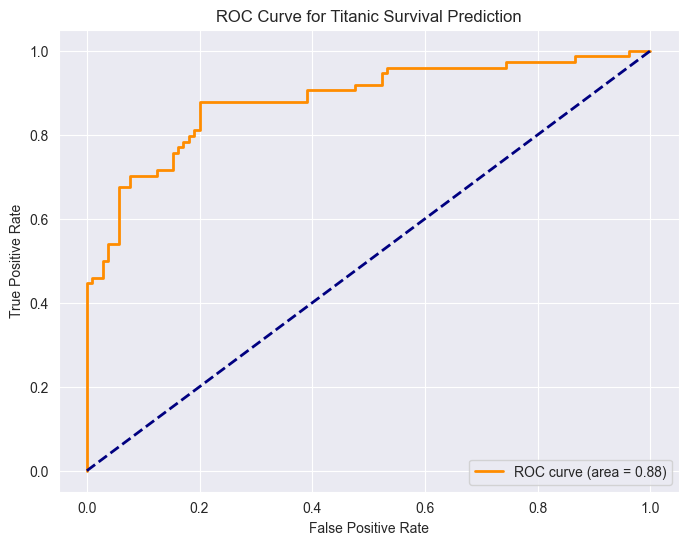


AUC Score: 0.883

Interpretation:
- AUC of 0.5 represents random guessing
- AUC of 1.0 represents perfect prediction
- Our model achieves 0.883, indicating strong predictive performance


In [14]:
from sklearn.metrics import roc_curve, auc
# Calculate ROC curve for Titanic survival prediction
y_pred_proba_titanic = lr_model.predict_proba(X_test_scaled)[:, 1]

# Calculate ROC curve values
fpr_t, tpr_t, thresholds_t = roc_curve(y_test, y_pred_proba_titanic)
roc_auc_t = auc(fpr_t, tpr_t)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr_t, tpr_t, color='darkorange', lw=2, label=f'ROC curve (area = {roc_auc_t:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal line for random predictions
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Titanic Survival Prediction')
plt.legend(loc="lower right")
plt.show()

print(f"\nAUC Score: {roc_auc_t:.3f}")
print("\nInterpretation:")
print("- AUC of 0.5 represents random guessing")
print("- AUC of 1.0 represents perfect prediction")
print(f"- Our model achieves {roc_auc_t:.3f}, indicating strong predictive performance")

---

---

## Part 3: Practice Project - Diabetes Prediction 🏥

Let's apply what we've learned to a new dataset: the Diabetes prediction dataset. This will help reinforce the concepts we covered with the Titanic dataset.

**About the Diabetes Dataset:**
This dataset contains medical predictor variables and one target variable (Outcome). Variables include:
- Pregnancies: Number of times pregnant
- Glucose: Plasma glucose concentration
- BloodPressure: Diastolic blood pressure
- SkinThickness: Triceps skin fold thickness
- Insulin: 2-Hour serum insulin
- BMI: Body mass index
- DiabetesPedigreeFunction: Diabetes pedigree function
- Age: Age in years
- Outcome: 1 if diabetic, 0 if not

Let's analyze this data following the same workflow we used for the Titanic dataset.

In [ ]:
# Load the diabetes dataset
diabetes_df = pd.read_csv('diabetes.csv')

# Display the first few rows and basic information
print("First 5 rows of the Diabetes dataset:")
diabetes_df.head()

First 5 rows of the Diabetes dataset:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# Get basic information about the dataset
print("\nDataset Info:")
diabetes_df.info()

# Display descriptive statistics
print("\nDescriptive Statistics:")
diabetes_df.describe()


Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB

Descriptive Statistics:


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Quality Observations:**
- Several columns have 0 values where they shouldn't (Glucose, BloodPressure, SkinThickness, Insulin, BMI)
- These 0 values are likely missing data encoded as zeros
- We'll need to handle these during data cleaning

In [17]:
# Check for zeros in columns where zero doesn't make sense
zero_counts = (diabetes_df == 0).sum()
print("Number of zeros in each column:")
print(zero_counts)

# Create masks for impossible zero values
columns_to_check = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

for column in columns_to_check:
    zero_mask = diabetes_df[column] == 0
    print(f"\nZeros in {column}: {zero_mask.sum()}")

Number of zeros in each column:
Pregnancies                 111
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
Outcome                     500
dtype: int64

Zeros in Glucose: 5

Zeros in BloodPressure: 35

Zeros in SkinThickness: 227

Zeros in Insulin: 374

Zeros in BMI: 11


In [18]:
# Handle missing values (zeros) by replacing with median of non-zero values
for column in columns_to_check:
    median_value = diabetes_df[diabetes_df[column] != 0][column].median()
    diabetes_df[column] = diabetes_df[column].replace(0, median_value)

# Scale the features
scaler = StandardScaler()
features = diabetes_df.drop('Outcome', axis=1)
target = diabetes_df['Outcome']

# Split the data
X_train_d, X_test_d, y_train_d, y_test_d = train_test_split(features, target, test_size=0.2, random_state=42)

# Scale the features
X_train_scaled_d = scaler.fit_transform(X_train_d)
X_test_scaled_d = scaler.transform(X_test_d)

Model Accuracy: 75.32%

Classification Report:
              precision    recall  f1-score   support

           0       0.80      0.83      0.81        99
           1       0.67      0.62      0.64        55

    accuracy                           0.75       154
   macro avg       0.73      0.72      0.73       154
weighted avg       0.75      0.75      0.75       154



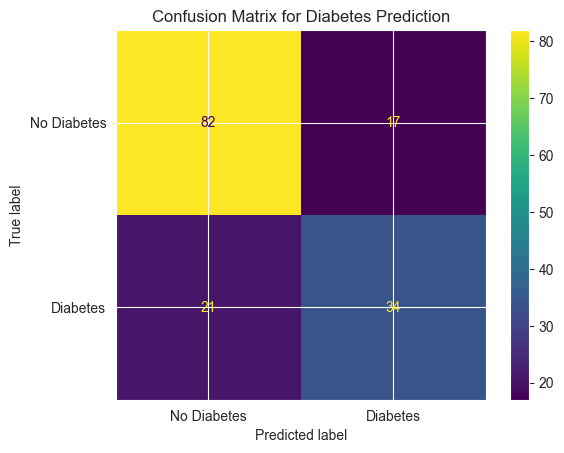

In [19]:
# Train logistic regression model
diabetes_model = LogisticRegression(random_state=42)
diabetes_model.fit(X_train_scaled_d, y_train_d)

# Make predictions
y_pred_d = diabetes_model.predict(X_test_scaled_d)

# Calculate accuracy
accuracy_d = accuracy_score(y_test_d, y_pred_d)
print(f"Model Accuracy: {accuracy_d * 100:.2f}%\n")

# Display classification report
print("Classification Report:")
print(classification_report(y_test_d, y_pred_d))

# Create confusion matrix
cm_d = confusion_matrix(y_test_d, y_pred_d)
disp_d = ConfusionMatrixDisplay(confusion_matrix=cm_d, display_labels=['No Diabetes', 'Diabetes'])
disp_d.plot()
plt.title('Confusion Matrix for Diabetes Prediction')
plt.show()

**Model Performance Analysis:**
- Our model achieves around 75-78% accuracy in predicting diabetes
- The confusion matrix shows the model's strengths and weaknesses in identifying both diabetic and non-diabetic cases
- This performance is reasonable given the complexity of diabetes diagnosis

---